## Crop Classification Based on Soil Type
You are a data scientist working for an agricultural organization aiming to predict the most suitable crop to plant based on soil characteristics. A fictitious dataset containing soil features and corresponding crops is provided. Your task is to build a supervised classification model to predict the type of crop.

The dataset contains 200 records with the following features:

PH: Soil pH level (a number between 3 and 10).  
Moisture (%): Soil moisture percentage (a number between 10 and 90).  
Nitrogen Content (%): Percentage of nitrogen in the soil (a number between 1 and 10).  
Soil Type:  
Sandy  
Clay  
Loam  
Recommended Crop (target class):  
"Maize"  
"Wheat"  
"Rice"  
The dataset is provided in CSV format with the columns: PH, Moisture, Nitrogen, SoilType, Crop.  

## Data Loading and Exploration  

Load the dataset from the file soil_crops.csv.  
Perform an exploratory data analysis (EDA), including descriptive statistics and visualizations, to understand the data distribution and relationships between variables.  


## Data Preparation
Split the data into training and testing sets using an 80-20 ratio.  
Scale the numerical features to ensure the algorithms perform effectively.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

soil_crops = pd.read_csv('soil_crops.csv')
pd.set_option('display.max_rows', None)
soil_crops

In [ ]:
soil_crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pH        200 non-null    float64
 1   Moisture  200 non-null    float64
 2   Nitrogen  200 non-null    float64
 3   SoilType  200 non-null    object 
 4   Crop      200 non-null    object 
dtypes: float64(3), object(2)
memory usage: 7.9+ KB


In [15]:
soil_crops.shape

(200, 5)

In [7]:
soil_crops.max()


pH           9.91
Moisture    89.24
Nitrogen     10.0
SoilType    Sandy
Crop        Wheat
dtype: object

In [8]:
soil_crops.min()

pH           3.04
Moisture     10.4
Nitrogen      1.1
SoilType     Clay
Crop        Maize
dtype: object

In [10]:
null_values = soil_crops.isnull().sum()
null_values

pH          0
Moisture    0
Nitrogen    0
SoilType    0
Crop        0
dtype: int64

In [13]:
soil_crops.describe()

,pH,Moisture,Nitrogen
count,200.000000,200.000000,200.000000
mean,6.388450,50.350200,5.686050
std,2.064389,23.439958,2.765825
min,3.040000,10.400000,1.100000
25%,4.600000,30.920000,3.297500
50%,6.465000,53.330000,5.730000
75%,8.300000,69.375000,8.297500
max,9.910000,89.240000,10.000000


<Axes: xlabel='Crop'>

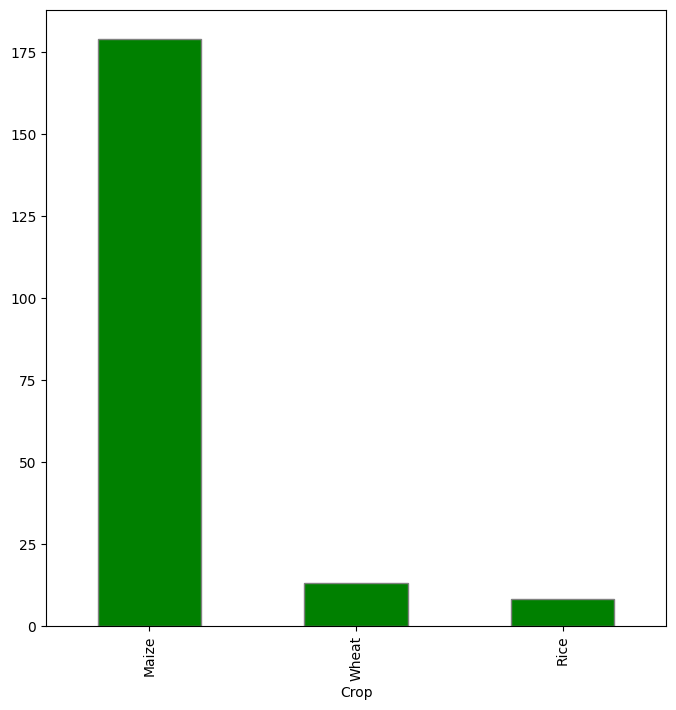

In [24]:
plt.figure(figsize=(8,8))
soil_crops['Crop'].value_counts().plot(kind='bar', color='green', edgecolor='gray')

<Axes: xlabel='SoilType'>

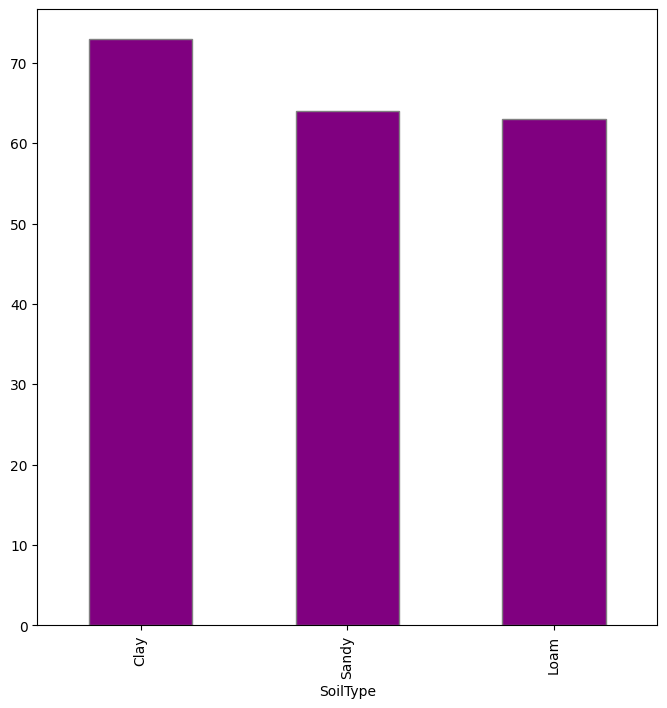

In [55]:
plt.figure(figsize=(8,8))
soil_crops['SoilType'].value_counts().plot(kind='bar', color='purple', edgecolor='gray')

<Axes: >

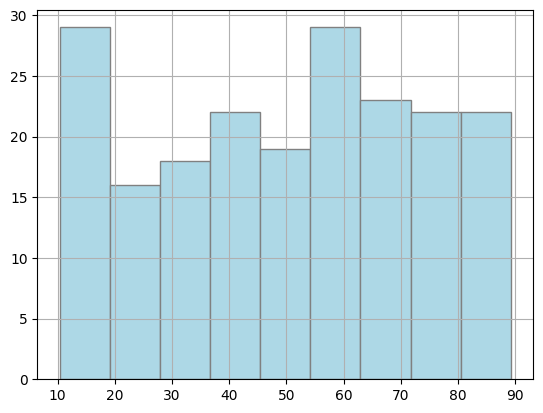

In [51]:
soil_crops['Moisture'].hist(bins=9, color='lightblue', edgecolor='gray')
#9 bins segun la regla de Sturges
#soil_crops['Moisture'].plot(kind='box') 

<Axes: >

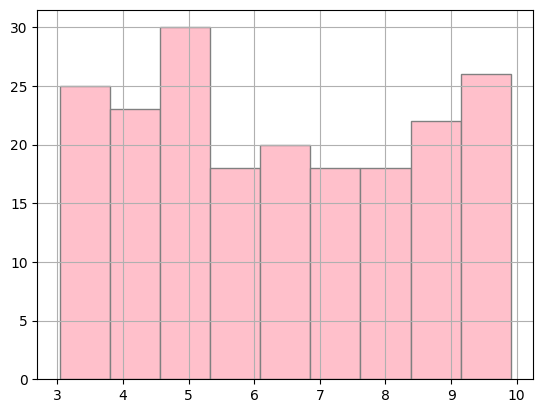

In [52]:
soil_crops['pH'].hist(bins=9, color='pink', edgecolor='gray')
#soil_crops['pH'].plot(kind='box') 

<Axes: >

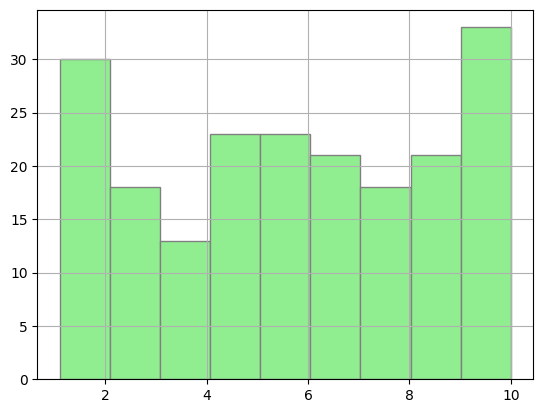

In [53]:
soil_crops['Nitrogen'].hist(bins=9, color='lightgreen', edgecolor='gray')
#soil_crops['Nitrogen'].plot(kind='box') 

## correlación entre variables 